In [35]:
## Library Imports
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn as imbl

## Custom libraries
import index_helpers as ih
import data_transformations as dtrans

df = ih.read_and_merge_segmented_data()
df = ih.index_df_by_person(df)

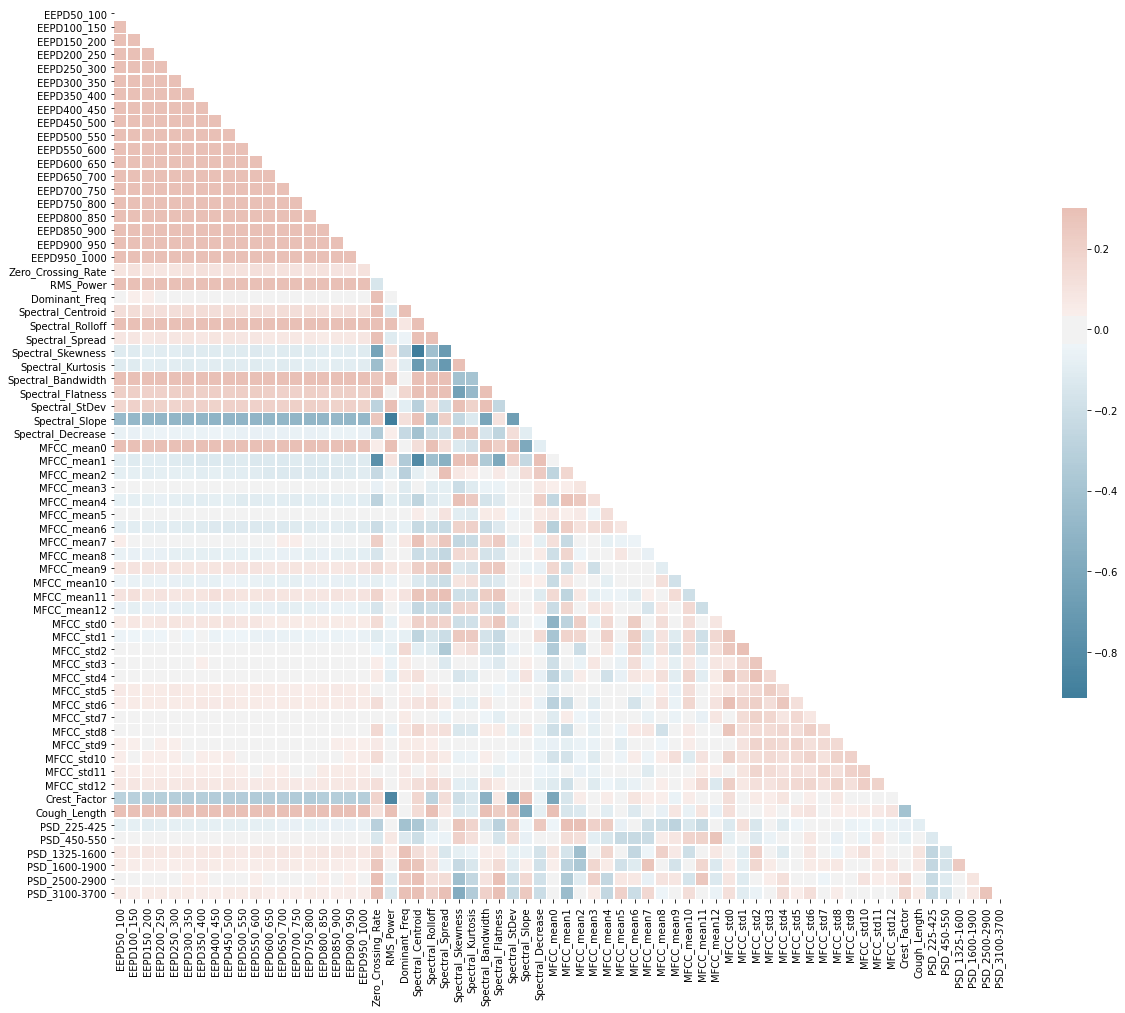

In [36]:
#Compute the correlation matrix
corr = df.drop('Label', axis=1).corr()

#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
df

Label  EEPD50_100  \
File_Name_split                      File_n_recording                      
008ba489-31ad-44d8-856b-fcf72369dc46 0                     1         6.0   
                                     1                     1         3.0   
                                     2                     1         4.0   
                                     3                     1         4.0   
                                     4                     1         4.0   
...                                                      ...         ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                     0         5.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                     0         4.0   
                                     1                     0         4.0   
                                     2                     0         3.0   
                                     3                     0         4.0   

                                                       EEPD100_150  \
File_Name_split                      File_n_recording                
008ba489-31ad-44d8-856b-fcf72369dc46 0                         6.0   
                                     1                         3.0   
                                     2                         4.0   
                                     3                         4.0   
                                     4                         4.0   
...                                                            ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                         5.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                         4.0   
                                     1                         4.0   
                                     2                         2.0   
                                     3                         5.0   

                                                       EEPD150_200  \
File_Name_split                      File_n_recording                
008ba489-31ad-44d8-856b-fcf72369dc46 0                         5.0   
                                     1                         3.0   
                                     2                         3.0   
                                     3                         4.0   
                                     4                         5.0   
...                                                            ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                         6.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                         4.0   
                                     1                         3.0   
                                     2                         2.0   
                                     3                         5.0   

                                                       EEPD200_250  \
File_Name_split                      File_n_recording                
008ba489-31ad-44d8-856b-fcf72369dc46 0                         4.0   
                                     1                         4.0   
                                     2                         4.0   
                                     3                         4.0   
                                     4                         4.0   
...                                                            ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                         6.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                         3.0   
                                     1                         3.0   
                                     2                         2.0   
                                     3                         5.0   

                                                       EEPD250_300  \
File_Name_split                      File_n_recording                
008ba489-31ad-44d8-856b-fcf72369dc46 0                         5.0   
                                     1                         4.0   
                                     2               

In [45]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(df)


array([[1.00000000e+00, 6.00000000e+00, 6.00000000e+00, ...,
        3.33662406e-02, 4.31946750e-02, 1.03850532e-02],
       [1.00000000e+00, 3.00000000e+00, 3.00000000e+00, ...,
        8.82386044e-03, 5.61018870e-02, 1.14293201e-02],
       [1.00000000e+00, 4.00000000e+00, 4.00000000e+00, ...,
        6.25770865e-03, 3.84102616e-02, 5.51467156e-03],
       ...,
       [0.00000000e+00, 4.00000000e+00, 4.00000000e+00, ...,
        1.59303006e-03, 2.39053213e-03, 2.00456823e-03],
       [0.00000000e+00, 3.00000000e+00, 2.00000000e+00, ...,
        2.42794994e-02, 4.43835314e-02, 6.33342192e-02],
       [0.00000000e+00, 4.00000000e+00, 5.00000000e+00, ...,
        2.33314440e-01, 1.17942033e-03, 4.15697582e-02]])

In [3]:
### NEW
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Label', axis=1), df['Label'], test_size=0.2)

#grid search attempt
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=5000).fit(X_train, y_train.to_numpy().squeeze())

predLR = LR.predict(X_test)

accuracyLR = LR.score(X_test, y_test.to_numpy().squeeze())

print(accuracyLR)

0.7196861626248217


In [4]:
i = corr[((corr > 0.8)) | (corr < -0.8) ].fillna(0)
i = i[i<1.0]
i = i[i>-1.0]
new = i**2
new[new.isnull()==True]=0
sumnew=new.sum(axis=0)
ind_=sumnew[sumnew>1]
ind_=ind_.index[1:]
final=df.drop(ind_,axis=1)
final

Label  EEPD50_100  \
File_Name_split                      File_n_recording                      
008ba489-31ad-44d8-856b-fcf72369dc46 0                     1         6.0   
                                     1                     1         3.0   
                                     2                     1         4.0   
                                     3                     1         4.0   
                                     4                     1         4.0   
...                                                      ...         ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                     0         5.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                     0         4.0   
                                     1                     0         4.0   
                                     2                     0         3.0   
                                     3                     0         4.0   

                                                       EEPD100_150  \
File_Name_split                      File_n_recording                
008ba489-31ad-44d8-856b-fcf72369dc46 0                         6.0   
                                     1                         3.0   
                                     2                         4.0   
                                     3                         4.0   
                                     4                         4.0   
...                                                            ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                         5.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                         4.0   
                                     1                         4.0   
                                     2                         2.0   
                                     3                         5.0   

                                                       EEPD150_200  \
File_Name_split                      File_n_recording                
008ba489-31ad-44d8-856b-fcf72369dc46 0                         5.0   
                                     1                         3.0   
                                     2                         3.0   
                                     3                         4.0   
                                     4                         5.0   
...                                                            ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                         6.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                         4.0   
                                     1                         3.0   
                                     2                         2.0   
                                     3                         5.0   

                                                       EEPD200_250  \
File_Name_split                      File_n_recording                
008ba489-31ad-44d8-856b-fcf72369dc46 0                         4.0   
                                     1                         4.0   
                                     2                         4.0   
                                     3                         4.0   
                                     4                         4.0   
...                                                            ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                         6.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                         3.0   
                                     1                         3.0   
                                     2                         2.0   
                                     3                         5.0   

                                                       EEPD250_300  \
File_Name_split                      File_n_recording                
008ba489-31ad-44d8-856b-fcf72369dc46 0                         5.0   
                                     1                         4.0   
                                     2               

In [5]:
### NEW
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final.drop('Label', axis=1), final['Label'], test_size=0.2)

#grid search attempt
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=5000).fit(X_train, y_train.to_numpy().squeeze())

predLR = LR.predict(X_test)

accuracyLR = LR.score(X_test, y_test.to_numpy().squeeze())

print(accuracyLR)

0.738944365192582


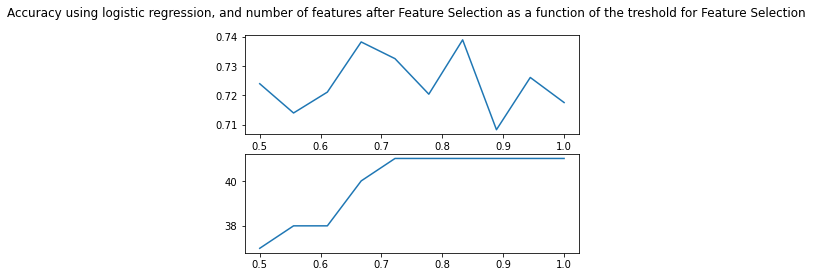

In [24]:
from data_transformations import * 
import numpy as pd
tresholds = np.linspace(0.5,1,10)
test=[]
features=[]
keep=df

for i in tresholds:
    #reduces dimensionality after Feature Correlation
    new = reduce_dimension(df, i)
    #test accuracy with simple LogReg
    log_test=test_LogReg(new)
    test.append(log_test)
    if log_test > max(test):
        keep=new 
    features.append(new.shape[1])
    


fig, axs = plt.subplots(2)
fig.suptitle('Accuracy using logistic regression, and number of features after Feature Selection as a function of the treshold for Feature Selection')
axs[0].plot(tresholds, test)
axs[1].plot(tresholds, features)


In [21]:
#we keep the best treshold and then keep the corresponding new df
treshold=tresholds[test.index(max(test))]
df = reduce_dimension(df, treshold)
T = test_LogReg(df)
T

0.7296718972895863

In [7]:
from data_transformations import * 
df2, pt2 = dtrans.power_transform_skewed_features(df)
a=test_LogReg(df)
b=test_LogReg(df2)
print(a)
print(b)

0.7211126961483595
0.7353780313837375


In [8]:
new = reduce_dimension(df, 0.000001)
new

Label  EEPD50_100  \
File_Name_split                      File_n_recording                      
008ba489-31ad-44d8-856b-fcf72369dc46 0                     1         6.0   
                                     1                     1         3.0   
                                     2                     1         4.0   
                                     3                     1         4.0   
                                     4                     1         4.0   
...                                                      ...         ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                     0         5.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                     0         4.0   
                                     1                     0         4.0   
                                     2                     0         3.0   
                                     3                     0         4.0   

                                                       MFCC_mean3  MFCC_mean5  \
File_Name_split                      File_n_recording                           
008ba489-31ad-44d8-856b-fcf72369dc46 0                  -1.204303   -0.572293   
                                     1                  -6.299678   13.402612   
                                     2                  -4.927361   -6.088919   
                                     3                 -10.745576    2.820380   
                                     4                 -10.860811    2.428896   
...                                                           ...         ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                 -13.406683  -18.381500   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                  23.390961  -15.374052   
                                     1                  27.882616  -15.141672   
                                     2                   9.217462    2.479320   
                                     3                  -9.429369   -7.557655   

                                                       MFCC_mean7  MFCC_mean8  \
File_Name_split                      File_n_recording                           
008ba489-31ad-44d8-856b-fcf72369dc46 0                  -1.717659  -19.916409   
                                     1                  -8.380814  -21.670786   
                                     2                 -13.666092  -10.565886   
                                     3                 -20.192568  -12.791121   
                                     4                 -20.596998  -12.539832   
...                                                           ...         ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                   7.068398  -16.370844   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                  25.235638  -34.967884   
                                     1                   4.297911  -40.376568   
                                     2                   0.900579  -28.346693   
                                     3                  39.718338  -23.198343   

                                                       MFCC_mean9  \
File_Name_split                      File_n_recording               
008ba489-31ad-44d8-856b-fcf72369dc46 0                   5.351038   
                                     1                   7.864798   
                                     2                  13.459983   
                                     3                  13.659514   
                                     4                  13.291077   
...                                                           ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                   6.433928   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                 -13.682807   
                                     1                   1.615484   
                                     2                   7.631612   
                                     3                 -11.280135   

                                                       MFCC_